<a href="https://colab.research.google.com/github/Mubarok982/Sentimen-Analisis/blob/main/Sentimen_Analisis_pengguna_apk_MLBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
!pip install google-play-scraper

from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.set_option('mode.chained_assignment', None)
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

import datetime as dt
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from wordcloud import WordCloud


import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Scrapping Dataset**

In [2]:
from google_play_scraper import app, reviews, Sort, reviews_all

#Menggali semua ulasan aplikasi dengan ID "com.mobile.legends" di google Play Store.
scrapeview = reviews_all(
    'com.mobile.legends',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=10000000
)

# **Menyimpan ulasan dalam format csv**

In [3]:
import csv

with open('ulasan_aplikasi_MLBB .csv', mode='w', newline='', encoding='utf-8') as csvfile:
  writer = csv.writer(csvfile)
  writer.writerow(['review', 'score'])
  for review in scrapeview:
    writer.writerow([review['content'], review['score']])

# **Loading Dataset**

In [4]:
app_reviews_df = pd.DataFrame(scrapeview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('app_reviews.csv', index=False)

#Membuat dataframe dari hasil scrapeview
app_reviews_df = pd.DataFrame(scrapeview)

#menghitung jumlah baris dan kolom dalam dataframe
jumlah_ulasan, jumlah_kolom = app_reviews_df.shape

#menampilkan jumlah ulasan dan kolom
print(f"Jumlah ulasan: {jumlah_ulasan}")
print(f"Jumlah kolom: {jumlah_kolom}")

Jumlah ulasan: 103500
Jumlah kolom: 11


In [5]:
# Menampilkan lima baris pertama dari DataFrame app_reviews_df
app_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,1f974727-bbc0-41e3-bb07-4b4dcdf3ac85,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tolong untuk developer MOONTON yang terhormat,...",4,50,1.9.93.10904,2025-07-21 13:25:53,None,NaT,1.9.93.10904
1,b5358a20-7c86-434d-aaee-4a35e695aca3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ya game nya baguss, tapi ada fitur yang kurang...",5,814,1.9.70.10634,2025-07-19 04:45:32,None,NaT,1.9.70.10634
2,7f51ce49-52fb-4f99-aff4-a3582da2c63f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"klo main selalu dapat tim beban, meskipun kita...",1,3617,1.9.70.10634,2025-06-28 05:00:49,None,NaT,1.9.70.10634
3,d223728c-8d0b-4ba9-aa13-a4372924f858,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terlalu banyak yg d upgrade dan tingkatkan dal...,1,461,1.9.70.10634,2025-06-28 07:56:32,None,NaT,1.9.70.10634
4,79b4abc1-6896-4070-b6da-dca3dfa89154,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Perbaiki jaringan,perbaiki juga foto album mas...",2,181,1.9.93.10904,2025-07-17 17:27:36,"Halo Kak,\nMaaf atas masalah jaringan yang Kak...",2025-07-20 07:46:48,1.9.93.10904


In [6]:
# Menampilkan informasi tentang DataFrame
app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103500 entries, 0 to 103499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              103500 non-null  object        
 1   userName              103500 non-null  object        
 2   userImage             103500 non-null  object        
 3   content               103500 non-null  object        
 4   score                 103500 non-null  int64         
 5   thumbsUpCount         103500 non-null  int64         
 6   reviewCreatedVersion  89693 non-null   object        
 7   at                    103500 non-null  datetime64[ns]
 8   replyContent          6542 non-null    object        
 9   repliedAt             6542 non-null    datetime64[ns]
 10  appVersion            89693 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 8.7+ MB


## **Menghapus fitur dengan terlalu banyak baris kosong**

In [23]:
# Hapus dari DataFrame
app_reviews_df = app_reviews_df.drop(columns=['replyContent', 'repliedAt'])

## **Menghapus baris kosong**

In [24]:
# Membuat DataFrame baru
clean_df = app_reviews_df.dropna()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89693 entries, 0 to 103499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              89693 non-null  object        
 1   userName              89693 non-null  object        
 2   userImage             89693 non-null  object        
 3   content               89693 non-null  object        
 4   score                 89693 non-null  int64         
 5   thumbsUpCount         89693 non-null  int64         
 6   reviewCreatedVersion  89693 non-null  object        
 7   at                    89693 non-null  datetime64[ns]
 8   appVersion            89693 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 6.8+ MB


## **Menghapus baris duplikat dari dataframe**

In [25]:
clean_df = clean_df.drop_duplicates()

jumlah_baris, jumlah_kolom = clean_df.shape

# Menampilkan jumlah baris dan kolom setelah menghapus duplikat
print(f"Jumlah baris setelah menghapus duplikat: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")
clean_df.info()

Jumlah baris setelah menghapus duplikat: 87441
Jumlah kolom: 9
<class 'pandas.core.frame.DataFrame'>
Index: 87441 entries, 0 to 103499
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              87441 non-null  object        
 1   userName              87441 non-null  object        
 2   userImage             87441 non-null  object        
 3   content               87441 non-null  object        
 4   score                 87441 non-null  int64         
 5   thumbsUpCount         87441 non-null  int64         
 6   reviewCreatedVersion  87441 non-null  object        
 7   at                    87441 non-null  datetime64[ns]
 8   appVersion            87441 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 6.7+ MB


# **Prepocessing Text**

In [51]:
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Mengunduh daftar kata-kata berhenti (stopwords) dalam bahasa Inggris
nltk.download('stopwords')

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#[A-Za-z0-9]+', '', text)
    text = re.sub(r'RT[\s]', '', text)
    text = re.sub(r"http\S+", '', text)
    text = re.sub(r'[0-9]+', '', text)
    text = re.sub(r'[^\w\s]', '', text)

    text = text.replace('\n', ' ')
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip(' ')
    return text


def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy", "alah", "epic", "abadi", "bot", "terhormat", "beban", "dark", "aja"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## menghapus kata **slang**

In [52]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

## **Penerapan Prepocessing text**

In [53]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Download the missing resource
import nltk
nltk.download('punkt_tab')

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [54]:
clean_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,sentiment_score,sentiment
0,1f974727-bbc0-41e3-bb07-4b4dcdf3ac85,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tolong untuk developer MOONTON yang terhormat,...",4,50,1.9.93.10904,2025-07-21 13:25:53,1.9.93.10904,tolong untuk developer MOONTON yang terhormat ...,tolong untuk developer moonton yang terhormat ...,tolong untuk developer moonton yang terhormat ...,"[tolong, untuk, developer, moonton, yang, terh...","[tolong, developer, moonton, untu, jaringan, b...",tolong developer moonton untu jaringan berpas ...,3,positive,3,positive
1,b5358a20-7c86-434d-aaee-4a35e695aca3,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ya game nya baguss, tapi ada fitur yang kurang...",5,814,1.9.70.10634,2025-07-19 04:45:32,1.9.70.10634,ya game nya baguss tapi ada fitur yang kurang ...,ya game nya baguss tapi ada fitur yang kurang ...,ya game nya baguss tapi ada fitur yang kurang ...,"[ya, game, nya, baguss, tapi, ada, fitur, yang...","[game, baguss, fitur, nonton, replay, skip, pe...",game baguss fitur nonton replay skip percepat ...,1,positive,1,positive
2,7f51ce49-52fb-4f99-aff4-a3582da2c63f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"klo main selalu dapat tim beban, meskipun kita...",1,3617,1.9.70.10634,2025-06-28 05:00:49,1.9.70.10634,klo main selalu dapat tim beban meskipun kitan...,klo main selalu dapat tim beban meskipun kitan...,klo main selalu dapat tim beban meskipun kitan...,"[klo, main, selalu, dapat, tim, beban, meskipu...","[klo, main, tim, kitanya, jago, ttp, kalah, ka...",klo main tim kitanya jago ttp kalah kali kali ...,-24,negative,-24,negative
3,d223728c-8d0b-4ba9-aa13-a4372924f858,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Terlalu banyak yg d upgrade dan tingkatkan dal...,1,461,1.9.70.10634,2025-06-28 07:56:32,1.9.70.10634,Terlalu banyak yg d upgrade dan tingkatkan dal...,terlalu banyak yg d upgrade dan tingkatkan dal...,terlalu banyak yg d upgrade dan tingkatkan dal...,"[terlalu, banyak, yg, d, upgrade, dan, tingkat...","[yg, upgrade, tingkatkan, segi, tampilan, berm...",yg upgrade tingkatkan segi tampilan bermanfaat...,1,positive,1,positive
4,79b4abc1-6896-4070-b6da-dca3dfa89154,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Perbaiki jaringan,perbaiki juga foto album mas...",2,181,1.9.93.10904,2025-07-17 17:27:36,1.9.93.10904,Perbaiki jaringanperbaiki juga foto album masa...,perbaiki jaringanperbaiki juga foto album masa...,perbaiki jaringanperbaiki juga foto album masa...,"[perbaiki, jaringanperbaiki, juga, foto, album...","[perbaiki, jaringanperbaiki, foto, album, relo...",perbaiki jaringanperbaiki foto album relog mul...,-16,negative,-16,negative


# **Pelabelan**

In [55]:
import csv
import requests
from io import StringIO
from bs4 import BeautifulSoup

lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
  reader = csv.reader(StringIO(response.text), delimiter=',')

  for row in reader:
    lexicon_positive[row[0]] = int(row[1])
else:
  print("gagal fetching data ke lexicon positif")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

## **Tentukan Polaritas komentar**

In [56]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity=''

    if (score >= 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'

    else:
        polarity = 'neutral'

    return score, polarity

# **hasil**

In [57]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
negative    53625
positive    33816
Name: count, dtype: int64


/tmp/ipython-input-58-1093539592.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


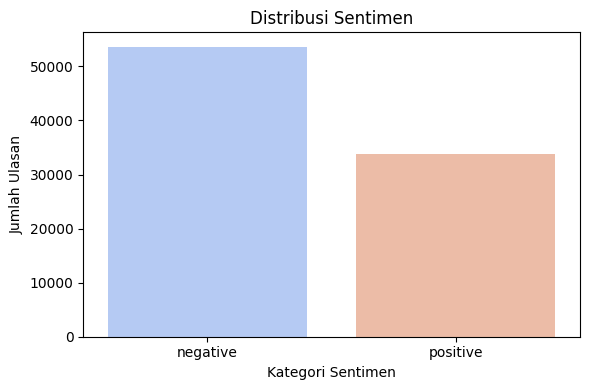

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
# Terapkan fungsi ke kolom token
clean_df[['sentiment_score', 'sentiment']] = clean_df['text_stopword'].apply(lambda x: pd.Series(sentiment_analysis_lexicon_indonesia(x)))

# Hitung jumlah masing-masing sentimen
sentiment_counts = clean_df['sentiment'].value_counts()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title('Distribusi Sentimen')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.tight_layout()
plt.show()

# **Wordcloud**

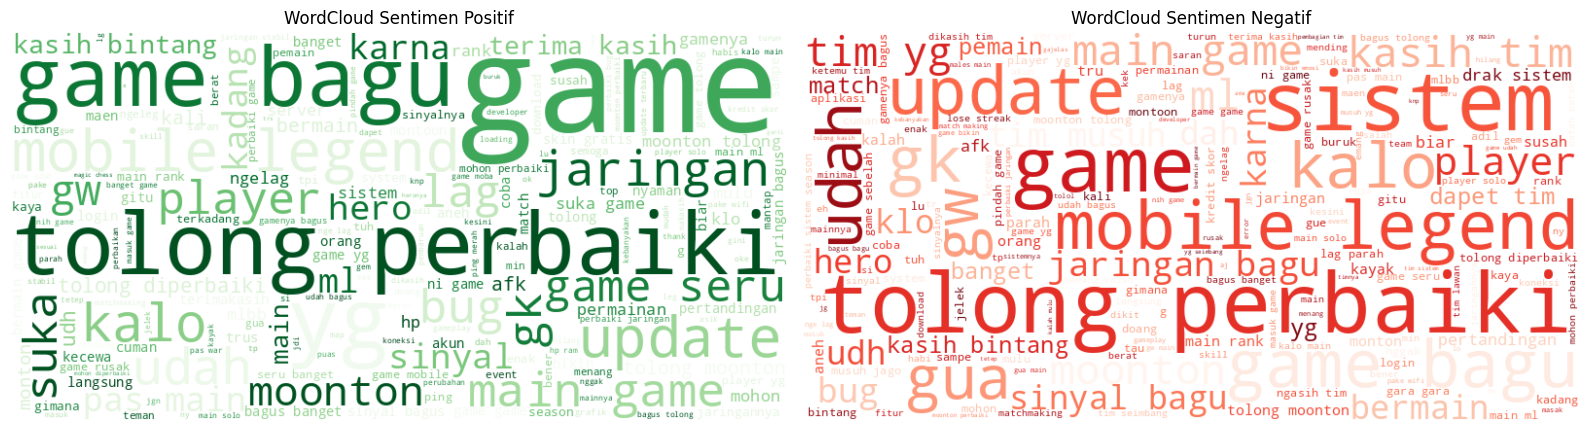

In [59]:
from wordcloud import WordCloud

# Gabungkan semua token jadi satu string per kategori
positive_words = ' '.join([' '.join(tokens) for tokens in clean_df[clean_df['sentiment'] == 'positive']['text_stopword']])
negative_words = ' '.join([' '.join(tokens) for tokens in clean_df[clean_df['sentiment'] == 'negative']['text_stopword']])

# Buat WordCloud Positif
wc_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_words)

# Buat WordCloud Negatif
wc_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_words)

# Plot
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')

plt.tight_layout()
plt.show()

# **Eksplorasi Label**

## **Data Splitting dan Ekstraksi Fitur dengan TF-IDF**

In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Pisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# **MODELLING**

## **Logistic Regression**

In [63]:
from sklearn.linear_model import LogisticRegression

# Membuat objek model Logistic Regression
logistic_regression = LogisticRegression()

# Melatih model Logistic Regression pada data pelatihan
logistic_regression.fit(X_train.toarray(), y_train)

# Prediksi sentimen pada data pelatihan dan data uji
y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

# Evaluasi akurasi model Logistic Regression pada data pelatihan
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

# Evaluasi akurasi model Logistic Regression pada data uji
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

# Menampilkan akurasi
print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

Logistic Regression - accuracy_train: 0.8300263037511436
Logistic Regression - accuracy_test: 0.826633884155755
